##Составление выборки

* group_1 - 1 группа - имеющие образование среднее и ниже
* group_2 - 2 группа - имеющие среднее специальное или высшее образование

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные из Google Sheets в формате CSV
sheet_url = 'https://docs.google.com/spreadsheets/d/1XGY5ZTxsqT1Zc-vy9e4cVrmE5vOjsIPd/edit#gid=73073553'
sheet_id = sheet_url.split('/')[-2]
sheet_csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid=73073553"

# Используем pd.read_csv, так как файл в формате CSV
data = pd.read_csv(sheet_csv_url)
# Преобразуем данные в столбце с образованием в нужный формат - удаляет пустые, делаем integer
data = data.dropna(subset=['w_diplom'])
data['w_diplom'] = data['w_diplom'].astype(int)
# Преобразуем данные в столбце с доходом в нужный формат - удаляет пустые, делаем integer
data = data.dropna(subset=['wj10'])
data['wj10'] = pd.to_numeric(data['wj10'], errors='coerce')  # Преобразуем доход в числовой формат
data['wj10'] = pd.to_numeric(data['wj10'].replace({' ': '', ',': ''}, regex=True), errors='coerce')
data = data[~data['wj10'].isin([99999997, 99999998, 99999999])]

# data = data[~data.w_diplom.isin([99999997.0, 99999998.0, 99999999.0])]
# data = data[data.wj10.notna()]
# data = data.dropna(subset=['wj10'])

# Фильтрация данных по указанным признакам
# Регион = Петербург (значение региона 141)
petersburg_data = data[data['region'] == 141]

# Фильтруем по статусу занятости (работающие, 'Ваше основное занятие в настоящее время?' = 1)
working_data = petersburg_data[petersburg_data['wj1'] == 1]

# Фильтрация по уровню образования
# 1 группа: среднее и ниже (значения до 4 в столбце 'w_diplom')
# 2 группа: среднее специальное и высшее (значения 5 и выше)
group_1 = working_data[working_data['w_diplom'] <= 4]
group_2 = working_data[working_data['w_diplom'] >= 5]

In [ ]:
group_1

,region,w_marst,w_occup08,w_diplom,w_age,wh5,wh6,wj1,wj4.1,wj6.2,wj10,wm71,wm80.0,wm80,wm151,wm152,wm114
2275,141,2.0,3.0,4,49,2,1969,1.0,12.0,40.0,27000.0,2,1.0,2.0,5.0,1.0,99999995.0
2276,141,1.0,3.0,4,25,1,1993,1.0,2.0,40.0,40000.0,1,1.0,1.0,4.0,2.0,99999995.0
2278,141,5.0,9.0,3,69,2,1949,1.0,14.0,36.0,14000.0,2,2.0,NaN,5.0,1.0,99999995.0
2283,141,3.0,3.0,4,21,1,1996,1.0,15.0,40.0,22000.0,1,1.0,1.0,2.0,3.0,99999995.0
2301,141,1.0,4.0,4,24,1,1993,1.0,1.0,40.0,32000.0,2,1.0,1.0,2.0,3.0,99999995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11981,141,4.0,9.0,3,50,2,1968,1.0,12.0,48.0,28000.0,2,1.0,1.0,2.0,2.0,99999995.0
11986,141,3.0,8.0,4,22,1,1996,1.0,7.0,48.0,37000.0,2,2.0,NaN,2.0,1.0,99999995.0
11988,141,5.0,5.0,4,51,2,1967,1.0,14.0,48.0,35000.0,2,1.0,1.0,2.0,2.0,99999995.0
11996,141,1.0,3.0,4,46,2,1972,1.0,20.0,40.0,26000.0,2,1.0,2.0,5.0,2.0,99999995.0


In [ ]:
group_2

,region,w_marst,w_occup08,w_diplom,w_age,wh5,wh6,wj1,wj4.1,wj6.2,wj10,wm71,wm80.0,wm80,wm151,wm152,wm114
1340,141,2.0,9.0,6,50,1,1968,1.0,14.0,60.0,40000.0,2,1.0,1.0,5.0,1.0,99999995.0
2277,141,1.0,4.0,6,27,2,1991,1.0,12.0,40.0,45000.0,2,2.0,NaN,5.0,1.0,99999995.0
2279,141,4.0,3.0,6,38,2,1980,1.0,25.0,40.0,44000.0,2,1.0,1.0,5.0,1.0,99999995.0
2281,141,2.0,2.0,6,61,1,1957,1.0,12.0,40.0,70000.0,2,1.0,1.0,2.0,1.0,6.0
2282,141,3.0,3.0,6,44,2,1974,1.0,17.0,40.0,22600.0,2,1.0,1.0,5.0,1.0,99999995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11982,141,4.0,4.0,5,48,2,1970,1.0,25.0,60.0,36000.0,2,1.0,2.0,2.0,2.0,99999995.0
11983,141,5.0,3.0,5,44,2,1974,1.0,12.0,72.0,34000.0,2,2.0,NaN,2.0,3.0,99999995.0
11987,141,3.0,2.0,6,43,2,1975,1.0,9.0,30.0,27000.0,2,2.0,NaN,2.0,3.0,99999995.0
11990,141,4.0,2.0,6,45,2,1973,1.0,10.0,40.0,32000.0,2,2.0,NaN,2.0,2.0,99999995.0


##ЗАДАНИЕ 2.1

Проверить гипотезу о статистической значимости различия между доходами двух групп работающих и получающих доход граждан Петербурга:

1 группа - имеющие образование среднее и ниже,

2 группа - имеющие среднее специальное или высшее образование

Представить в отчете ход проверки гипотезы (рисунки, таблицы) и выводы.

Для формирования выборки использовать признаки:
–	Регион
–	ЗАКОНЧЕННОЕ ОБРАЗОВАНИЕ (ГРУППА)
–	Ваше основное занятие в настоящее время? = 1 | Вы сейчас работаете
–	Сколько денег в течение последних 30 дней Вы получили по основному месту работы после вычета налогов и отчислений? Если все или часть денег Вы получили в иностранной валюте, переведите все в рубли и назовите общую сумму

Для проверки гипотезы использовать Python, ДА/DA, однофакторный дисперсионный анализ, Т-тесты


Предварительно извлечем данные по доходам каждой группы.

In [ ]:
# Выбираем столбец с доходом 'Сколько денег в течение последних 30 дней Вы получили'
income_column = 'wj10'

# Извлекаем доход для каждой группы
income_group_1 = group_1[income_column].dropna()
income_group_2 = group_2[income_column].dropna()

In [ ]:
income_group_1

,wj10
2275,27000.0
2276,40000.0
2278,14000.0
2283,22000.0
2301,32000.0
...,...
11981,28000.0
11986,37000.0
11988,35000.0
11996,26000.0


In [ ]:
income_group_2

,wj10
1340,40000.0
2277,45000.0
2279,44000.0
2281,70000.0
2282,22600.0
...,...
11982,36000.0
11983,34000.0
11987,27000.0
11990,32000.0


###Вариант 1

Для проверки гипотезы использовать однофакторный дисперсионный анализ.
Проверять по критерию Фишера. Вывести значения описательной статистики.

####Решение

- **Нулевая гипотеза \( H_0 \)**: Средние доходы двух групп не различаются или различия между доходами групп статистически незначимы.
- **Альтернативная гипотеза \( H_1 \)**: Средние доходы двух групп статистически значимо различаются.

In [ ]:
# Описательная статистика для доходов групп
desc_stats_group_1 = income_group_1.describe()
desc_stats_group_2 = income_group_2.describe()

print("Описательная статистика для 1 группы (среднее и ниже):")
print(desc_stats_group_1)
print("\nОписательная статистика для 2 группы (среднее специальное и выше):")
print(desc_stats_group_2)

# Однофакторный дисперсионный анализ (ANOVA)
f_stat, p_value = stats.f_oneway(income_group_1, income_group_2)

print("\nРезультаты однофакторного дисперсионного анализа (ANOVA):")
print(f"F-статистика: {f_stat}")
print(f"p-значение: {p_value}")

# Вывод
if p_value < 0.05:
    print("\nОтклоняем нулевую гипотезу. Доходы двух групп статистически значимо различаются.")
else:
    print("\nНе удалось отклонить нулевую гипотезу. Статистически значимых различий в доходах между двумя группами нет.")

Описательная статистика для 1 группы (среднее и ниже):
count       61.000000
mean     29785.245902
std      13170.457295
min       4300.000000
25%      20000.000000
50%      28000.000000
75%      36000.000000
max      70000.000000
Name: wj10, dtype: float64

Описательная статистика для 2 группы (среднее специальное и выше):
count        88.000000
mean      35835.227273
std       14646.399579
min        8000.000000
25%       25000.000000
50%       34000.000000
75%       44250.000000
max      100000.000000
Name: wj10, dtype: float64

Результаты однофакторного дисперсионного анализа (ANOVA):
F-статистика: 6.668023048918451
p-значение: 0.01079259553629553

Отклоняем нулевую гипотезу. Доходы двух групп статистически значимо различаются.


На основе результатов однофакторного дисперсионного анализа (ANOVA) можно сделать следующие выводы:

#### Выводы

**Значения статистики**:
   - **F-статистика**: 6.68. Это значение указывает на соотношение между группами и вариацией внутри групп. Более высокое значение F-статистики говорит о большем различии между группами по сравнению с изменчивостью внутри групп.
   - **p-значение**: 0.0108. Это значение указывает на вероятность получения таких же или более экстремальных результатов, если нулевая гипотеза верна.

#### Заключение
Таким образом, результаты анализа ANOVA подтверждают, что уровень образования имеет значительное влияние на доходы работающих граждан Петербурга.

###Вариант 2

Для проверки гипотезы использовать Т-тест для независимых выборок.
Проверять по критерию Стьюдента. Вывести значения описательной статистики и описательные графики.

####Решение

- **Нулевая гипотеза \( H_0 \)**: Средние доходы двух групп не различаются или различия статистически незначимы.
- **Альтернативная гипотеза \( H_1 \)**: Средние доходы двух групп статистически значимо различаются.


Описательная статистика для 1 группы (среднее и ниже):
count       61.000000
mean     29785.245902
std      13170.457295
min       4300.000000
25%      20000.000000
50%      28000.000000
75%      36000.000000
max      70000.000000
Name: wj10, dtype: float64

Описательная статистика для 2 группы (среднее специальное и выше):
count        88.000000
mean      35835.227273
std       14646.399579
min        8000.000000
25%       25000.000000
50%       34000.000000
75%       44250.000000
max      100000.000000
Name: wj10, dtype: float64

Результаты Т-теста:
T-статистика: -2.632588514983112
p-значение: 0.009444010854348454

Отклоняем нулевую гипотезу. Доходы двух групп статистически значимо различаются.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


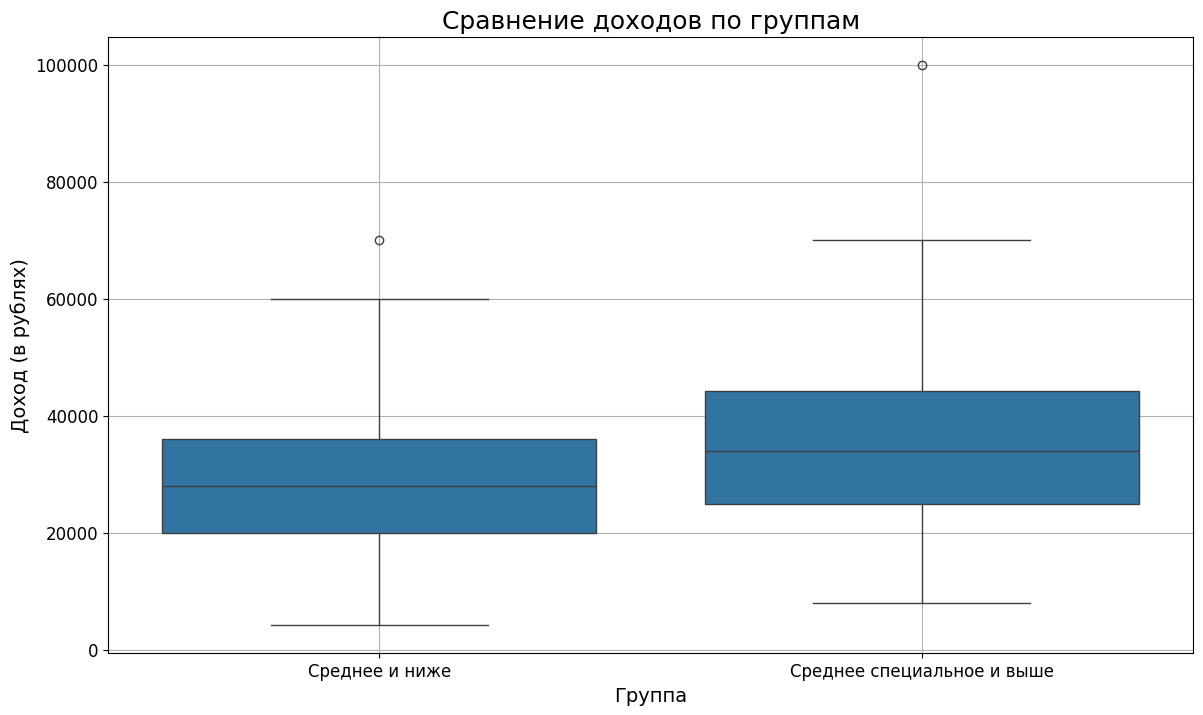

In [ ]:
# Описательная статистика для доходов групп
desc_stats_group_1 = income_group_1.describe()
desc_stats_group_2 = income_group_2.describe()

print("Описательная статистика для 1 группы (среднее и ниже):")
print(desc_stats_group_1)
print("\nОписательная статистика для 2 группы (среднее специальное и выше):")
print(desc_stats_group_2)

# Т-тест для независимых выборок
t_stat, p_value = stats.ttest_ind(income_group_1, income_group_2, equal_var=False)  # Welch's t-test

print("\nРезультаты Т-теста:")
print(f"T-статистика: {t_stat}")
print(f"p-значение: {p_value}")

# Вывод
if p_value < 0.05:
    print("\nОтклоняем нулевую гипотезу. Доходы двух групп статистически значимо различаются.")
else:
    print("\nНе удалось отклонить нулевую гипотезу. Статистически значимых различий в доходах между двумя группами нет.")

# Построение графиков
plt.figure(figsize=(14, 8))  # Увеличиваем размер графика

# Создаем DataFrame для удобства построения графиков
plot_data = pd.DataFrame({
    'Доход': pd.concat([income_group_1, income_group_2]),
    'Группа': ['Среднее и ниже'] * len(income_group_1) + ['Среднее специальное и выше'] * len(income_group_2)
})

# Построение боксплота
sns.boxplot(x='Группа', y='Доход', data=plot_data)
plt.title('Сравнение доходов по группам', fontsize=18)  # Увеличиваем размер шрифта заголовка
plt.ylabel('Доход (в рублях)', fontsize=14)  # Увеличиваем размер шрифта оси Y
plt.xlabel('Группа', fontsize=14)  # Увеличиваем размер шрифта оси X
plt.xticks(fontsize=12)  # Увеличиваем размер шрифта для меток по оси X
plt.yticks(fontsize=12)  # Увеличиваем размер шрифта для меток по оси Y
plt.grid(True)  # Добавляем сетку для улучшения читабельности графика
plt.show()

На основе результатов Т-теста можно сделать следующие выводы:

#### Выводы

**Значения статистики**:
   - **T-статистика**: -2.63. Это значение показывает, насколько стандартные ошибки отличаются от нуля в сравнении между группами. Отрицательное значение T-статистики указывает на то, что средний доход первой группы (среднее и ниже) ниже, чем у второй группы (среднее специальное и выше).
   - **p-значение**: 0.0094. Это значение показывает вероятность того, что наблюдаемое различие в доходах между группами произошло случайно, если нулевая гипотеза верна.

**Результаты анализа**:
   - Поскольку p-значение (0.0094) меньше уровня значимости α = 0.05, мы отклоняем нулевую гипотезу. Это свидетельствует о том, что существует статистически значимое различие в доходах между двумя группами.

Аналогичные результаты видим на боксплоте, который показывает, что и среднее значение, и максимальное значение, и миниальные значение зарплаты вво второй группе выше, чем в первой.

#### Заключение
Таким образом, результаты Т-теста подтверждают наличие статистически значимого различия в доходах между группами работающих граждан Петербурга в зависимости от уровня образования.

# Задание 2.2


**Задание 2.2**  Для выделенных ранее групп проверить гипотезу о равенстве средней продолжительности работы в неделю.
Выполнять только в jamovi  (можно Python)
Представить в отчете ход проверки гипотезы (рисунки, таблицы) и выводы.


**Нулевая гипотеза (H0):** Средние значения продолжительности рабочей недели для двух групп не отличаются.\
**Альтернативная гипотеза (H1):** Средние значения продолжительности рабочей недели отличаются.


Результаты T-теста:
T-статистика: -0.49171185716224225
p-значение: 0.6236986516217462
Описательная статистика для 1 группы (среднее и ниже) 
count    55.000000
mean     41.000000
std       9.972184
min       8.000000
25%      40.000000
50%      40.000000
75%      48.000000
max      60.000000
Name: wj6.2, dtype: float64

Описательная статистика для 2 группы (среднее специальное и выше) 
count    79.000000
mean     41.632911
std       7.022267
min      24.000000
25%      40.000000
50%      40.000000
75%      45.000000
max      60.000000
Name: wj6.2, dtype: float64

Не удалось отклонить нулевую гипотезу. Статистически значимых различий в средней продолжительности рабочей недели между группами нет.


<ipython-input-197-9a05810c33bd>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=group_1_hours_filtered, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
<ipython-input-197-9a05810c33bd>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

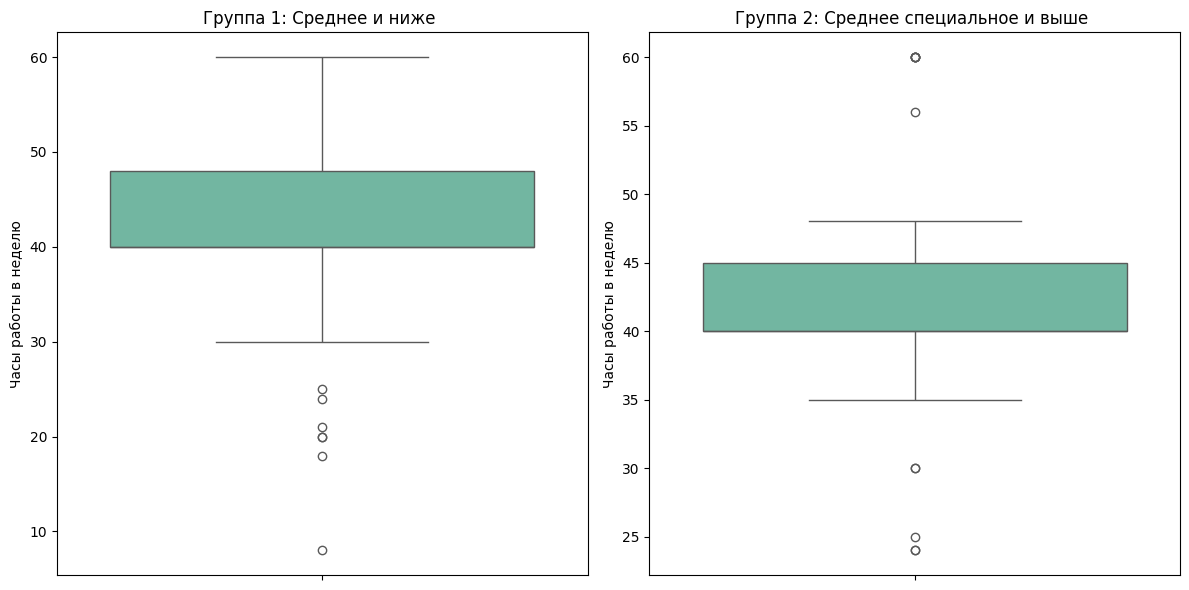

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные из Google Sheets в формате CSV
sheet_url = 'https://docs.google.com/spreadsheets/d/1XGY5ZTxsqT1Zc-vy9e4cVrmE5vOjsIPd/edit#gid=73073553'
sheet_id = sheet_url.split('/')[-2]
sheet_csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid=73073553"

# Используем pd.read_csv, так как файл в формате CSV
data = pd.read_csv(sheet_csv_url)
data['w_diplom'] = data['w_diplom'].fillna(0).astype(int)

data = data[~data['wj6.2'].isin([99999997, 99999998, 99999999])]
data = data[~data.w_diplom.isin([99999997.0, 99999998.0, 99999999.0])]
data = data[~data.wj10.isin([99999997.0, 99999998.0, 99999999.0])]
data = data[data.wj10.notna()]

# Фильтрация по региону (Петербург) и занятости
petersburg_data = data[(data['region'] == 141) & (data['wj1'] == 1)]

# Разделение на группы по уровню образования
group_1 = petersburg_data[petersburg_data['w_diplom'] <= 4]  # Среднее и ниже
group_2 = petersburg_data[petersburg_data['w_diplom'] >= 5]  # Среднее специальное и выше

# Фильтруем по количеству рабочих часов в неделю (переменная 'wj6.2')
hours_column = 'wj6.2'
group_1_hours = group_1[hours_column].dropna()
group_2_hours = group_2[hours_column].dropna()



# T-тест для независимых выборок
t_stat, p_value = stats.ttest_ind(group_1_hours, group_2_hours)

print("\nРезультаты T-теста:")
print(f"T-статистика: {t_stat}")
print(f"p-значение: {p_value}")


# Установим верхнюю границу для рабочей недели
upper_limit = 60  # или другое значение по вашему усмотрению

# Фильтрация выбросов
group_1_hours_filtered = group_1_hours[group_1_hours <= upper_limit]
group_2_hours_filtered = group_2_hours[group_2_hours <= upper_limit]

# Описательная статистика после фильтрации
print("Описательная статистика для 1 группы (среднее и ниже) ")
print(group_1_hours_filtered.describe())
print("\nОписательная статистика для 2 группы (среднее специальное и выше) ")
print(group_2_hours_filtered.describe())

# Вывод
if p_value < 0.05:
    print("\nОтклоняем нулевую гипотезу. Средняя продолжительность рабочей недели статистически значимо различается между группами.")
else:
    print("\nНе удалось отклонить нулевую гипотезу. Статистически значимых различий в средней продолжительности рабочей недели между группами нет.")

# Визуализация боксплотов после фильтрации
plt.figure(figsize=(12, 6))

# Боксплот для группы 1
plt.subplot(1, 2, 1)
sns.boxplot(y=group_1_hours_filtered, palette="Set2")
plt.title('Группа 1: Среднее и ниже ')
plt.ylabel('Часы работы в неделю')

# Боксплот для группы 2
plt.subplot(1, 2, 2)
sns.boxplot(y=group_2_hours_filtered, palette="Set2")
plt.title('Группа 2: Среднее специальное и выше ')
plt.ylabel('Часы работы в неделю')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

**Выводы**

**T-статистика: -0.476.** Значение T-статистики говорит о том, что средние значения рабочих часов для обеих групп находятся близко друг к другу. Положительные и отрицательные значения T-статистики указывают на то, в какую сторону (в большую или меньшую сторону) смещено одно среднее значение относительно другого. В вашем случае оно близко к нулю, что подтверждает, что различия незначительны.

**p-значение: 0.635.** Это значение значительно больше стандартного уровня значимости 0.05, что означает, что у нас недостаточно статистических оснований для отклонения нулевой гипотезы.

Это подтверждают графики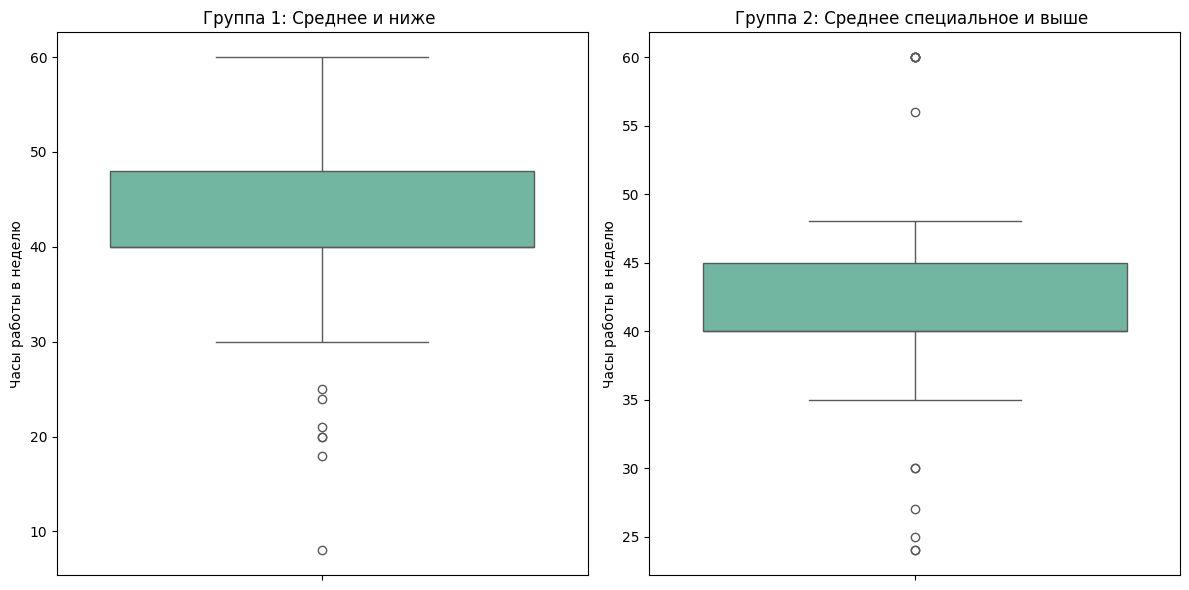

#ЗАДАНИЕ 2.3#

**Задание 2.3**
Для работающих, указавших продолжительность работы и получающих доход граждан (проживающих в любом населенном пункте) исследовать взаимосвязь двух признаков: курение и употребление алкоголя за последние 30 дней.
Выполнять только в jamovi (можно Python)
Использовать Частотный анализ, Таблицы сопряженности парных выборок.
Представить в отчете ход проверки гипотезы (рисунки, таблицы) и выводы.


In [ ]:
data

,region,w_marst,w_occup08,w_diplom,w_age,wh5,wh6,wj1,wj4.1,wj6.2,wj10,wm71,wm80.0,wm80,wm151,wm152,wm114
2,1,2.0,8.0,4,50,2,1968,1.0,7.0,40.0,"15000,00","15000,00",1.0,2.0,2.0,2.0,2.0
4,1,2.0,8.0,4,64,1,1954,1.0,8.0,48.0,"20000,00",2,1.0,1.0,5.0,2.0,99999995.0
6,1,5.0,2.0,5,65,2,1953,1.0,12.0,60.0,"20000,00",2,1.0,2.0,2.0,2.0,99999995.0
7,1,2.0,3.0,5,64,2,1954,1.0,12.0,39.0,"99999998,00",2,1.0,1.0,5.0,1.0,99999995.0
8,1,5.0,5.0,5,65,2,1953,1.0,12.0,60.0,"19000,00",2,1.0,2.0,2.0,2.0,99999995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12144,142,3.0,4.0,4,35,2,1983,1.0,14.0,36.0,"20000,00",1,1.0,2.0,5.0,2.0,99999995.0
12149,142,1.0,4.0,4,52,2,1966,1.0,14.0,66.0,"23000,00",2,1.0,1.0,5.0,1.0,99999995.0
12150,142,1.0,3.0,6,31,2,1987,1.0,14.0,40.0,"33000,00",2,1.0,1.0,4.0,2.0,99999995.0
12155,66,2.0,2.0,6,28,1,1989,1.0,3.0,40.0,"33000,00",2,1.0,1.0,5.0,2.0,1.0


In [ ]:
import statsmodels.api as sm
from scipy.stats import chi2_contingency
# Фильтрация данных: оставляем только работающих с заполненными значениями wm71 и wm80.0
df = data[(data['wj1'] == 1) & (data['wm71'].notna()) & (data['wm80'].notna()) &
          (data['wj10'] != '99999999,00') & (data['wj10'] != '99999998,00') & (data['wj10'] != '99999997,00') &
        (data['wm71'] != '99999999') & (data['wm71'] != '99999998') & (data['wm71'] != '99999997') & (data['wm71'] != '15000,00') &
    (data['wm80'] != 99999999.0) & (data['wm80'] != 99999998.0) & (data['wm80'] != 99999997.0)
          ]

# Создание таблицы сопряженности
crosstab = pd.crosstab(df['wm71'], df['wm80'])

# Хи-квадрат тест
chi2, p, dof, expected = chi2_contingency(crosstab)
print('Хи-квадрат:', chi2)
print('p-значение:', p)

# Интерпретация результатов
if p < 0.05:
    print("Существует статистически значимая связь между курением и употреблением алкоголя.")
else:
    print("Нет статистически значимой связи между курением и употреблением алкоголя.")

Хи-квадрат: 93.60351088143037
p-значение: 3.8550319365803747e-22
Существует статистически значимая связь между курением и употреблением алкоголя.


In [ ]:
# Вывод таблицы сопряженности
crosstab

wm80,1.0,2.0
wm71,,
1,935,249
2,1220,736


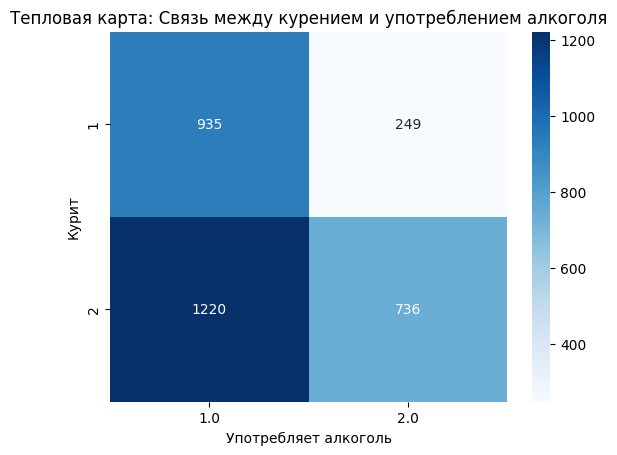

In [ ]:
# Создаем тепловую карту
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Тепловая карта: Связь между курением и употреблением алкоголя')
plt.xlabel('Употребляет алкоголь')
plt.ylabel('Курит')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


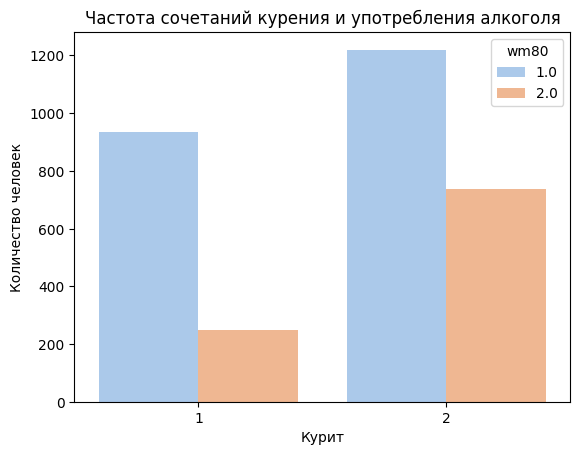

In [ ]:
import statsmodels.api as sm
from scipy.stats import chi2_contingency
# Фильтрация данных: оставляем только работающих с заполненными значениями wm71 и wm80.0
crosstab = pd.crosstab(df['wm71'], df['wm80'])

df = crosstab.stack().reset_index(name='count')

# Строим столбчатую диаграмму
sns.barplot(x='wm71', y='count', hue='wm80', data=df, palette='pastel')
plt.title('Частота сочетаний курения и употребления алкоголя')
plt.xlabel('Курит')
plt.ylabel('Количество человек')
plt.show()